# Build ALL* the classifiers!
© Explore Data Science Academy

\* well, not ALL the classifiers. Some we're leaving up to you to play with.

## Learning Objectives

By the end of this train, you should be able to:

* Build multiple types of classification models; and
* Figure out which model is better at fitting to your dataset.

## Outline

In this train we will:
* Pre-process the MBTI dataset;
* Build seven different types of classification model;
* Perform cross validation on these models; and 
* Visualise the different models using dummy data.

## Introduction

In this train, we will throw some of the most common classifiers at the MBTI problem!  Let's not worry too much about what each algorithm is doing. Instead, we will focus on how to tell which model is likely to be better at solving this problem. To do so, we will fit the following classifiers to the MBTI dataset:

* Logistic Regression
* K Nearest Neighbours (KNN)
* Support Vector Machines (SVM)
* Decision Trees
* [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

Then we will leave it up to you to play with a few additional models:

* [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
* [LDA / QDA](https://scikit-learn.org/stable/modules/lda_qda.html)
* [Neural Network](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

This approach highlights a key principle in machine learning.  The best models are built through **iteration**. We need to be able to implement a 'quick and dirty' model that should give us a good idea of how to proceed in finding a better solution to a particular problem. The quicker we can generate a couple of results, the quicker we can come up with new ideas of how to proceed.

### Imports
To start, lets import everything we will require. This will be some feature extraction methods for text, methods to split our data, and all the models we want to train.

In [93]:
import sys
!{sys.executable} -m pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


### Data Pre-Processing

In [ ]:
Df_test = pd.read_csv('test.csv') # no labels
Df_train= pd.read_csv('train.csv')

In [ ]:
Df_test.head()

In [ ]:
Df_train.head()


In [98]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
Df_train['message'] = Df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Make lower case
print ('Lowering case...')
Df_train['message']= Df_train['message'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
Df_train['message'] = Df_train['message'].apply(remove_punctuation_numbers)


# Removal hashtags
Df_train['message'] = Df_train['message'].str.replace('#.*?(?=\s|$)', '', case=False)


                 



Removing URLs...
Lowering case...
Cleaning punctuation...


C:\Users\USER\AppData\Local\Temp/ipykernel_9828/4111498354.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  Df_train['message'] = Df_train['message'].str.replace('#.*?(?=\s|$)', '', case=False)


You should be familiar with these steps from previous trains on handling text data, specifically the MBTI dataset. Can you think of, and implement, additional data cleaning and optimisation steps to improve our classification model?

**Note:** Depending on the machine you're using and the quality of internet connection, the following cell may take several minutes to execute. 

We will only be looking at the Introvert / Extrovert dimension here.  Can you figure out how to use this script to build models for the different types? 

all_mbti['I'] = all_mbti['type'].apply(lambda x: x[0] == 'I').astype('int')
y = all_mbti['I']
y.shape

Now lets fit the data to the Count Vectorizer, removing all English stop words.

In [99]:
pip install tfidf


Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(preprocessor=list, tokenizer=list, ngram_range=(1,2),min_df=2, strip_accents = 'ascii', smooth_idf=False)
X = vect.fit_transform(Df_train['message'])
y=Df_train['sentiment']

In [101]:
X.shape

(15819, 1464)

We'll now save the dataset so that you don't have to do the pre-processing again if you come back to revise this train.

In [102]:
Df_train_vect = pd.DataFrame(X.A, columns=vect.get_feature_names())

Df_train_vect.to_csv('Df_train_vect.csv')

We have alot of training data here!  To speed the alogorithms up and illustrate the effects, we will only be using the first 5,000 rows of data.  Please play around with this $n$ to get a feel of how each algorithm responds to more data (from an accuracy and training time point of view).

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y,stratify=y, test_size = 0.15, random_state = 2022)

If we assume that everyone is introverted, we would get this accuracy:

## Let's build some classification models!

In the next two cells, we will define the model names and call the model implementation classes. Note how some of the classifiers need input variables.  These are examples of **hyperparameters**. 

In [104]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM',          
         'Decision Tree', 'Random Forest',  'AdaBoost']



In [105]:
classifiers = [LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]
    



While this next cell is running, see if you can tell which algorithm takes the longest to train. Why do you think this is so?

In [106]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall = metrics.recall_score(y_train, y_pred, average='macro')
    f1 = metrics.f1_score(y_train, y_pred, average='macro')
    f1_test = metrics.f1_score(y_test, y_pred_test, average='macro')
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classificati

... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classificati

... predicting
... scoring
... All done!


That's all done! Now let's take a look at the results.

In [122]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.842779,0.911890,0.702937,0.761903,0.546058,160.736287
Nearest Neighbors,0.799494,0.752552,0.716037,0.727039,0.534993,0.026030
Logistic Regression,0.702514,0.706760,0.514810,0.544368,0.515530,4.890613
AdaBoost,0.625093,0.521167,0.449607,0.458104,0.442491,29.522618
Decision Tree,0.628514,0.682327,0.416116,0.422406,0.395157,2.100189
Linear SVM,0.557043,0.358506,0.270689,0.216526,0.220973,173.124322
Random Forest,0.539343,0.384819,0.250162,0.175495,0.175198,0.102538


This is way too many numbers to comprehend. Let's plot these values to see if we can make sense of them.

<AxesSubplot:xlabel='Classifier'>

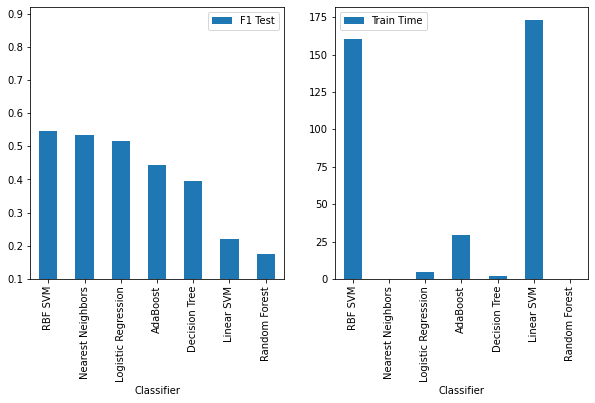

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.10,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

To better understand the performance of some of the models, lets view a few confusion matrices and classification reports of their results.

In [135]:
confusion['Logistic Regression']

array([[ 155,  111,  787,   49],
       [  28,  666, 1165,  141],
       [  30,  186, 6488,  546],
       [   2,   32,  923, 2137]], dtype=int64)

In [136]:
confusion['RBF SVM']

array([[ 462,   37,  570,   33],
       [   4, 1072,  849,   75],
       [   0,   12, 7072,  166],
       [   2,    4,  362, 2726]], dtype=int64)

In [137]:
print(class_report['RBF SVM'])

              precision    recall  f1-score   support

          -1       0.99      0.42      0.59      1102
           0       0.95      0.54      0.69      2000
           1       0.80      0.98      0.88      7250
           2       0.91      0.88      0.89      3094

    accuracy                           0.84     13446
   macro avg       0.91      0.70      0.76     13446
weighted avg       0.86      0.84      0.83     13446



In [138]:
models['RBF SVM']=clf

In [139]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
Df_test['message'] = Df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Make lower case
print ('Lowering case...')
Df_test['message']= Df_test['message'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
Df_test['message'] = Df_test['message'].apply(remove_punctuation_numbers)
# Removal hashtags
Df_test['message'] = Df_test['message'].str.replace('#.*?(?=\s|$)', '', case=False)

# Remove 'RT'
Df_test['message'] = Df_test['message'].str.replace('RT', '', case=False)



Removing URLs...
Lowering case...
Cleaning punctuation...


C:\Users\USER\AppData\Local\Temp/ipykernel_9828/1918997386.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  Df_test['message'] = Df_test['message'].str.replace('#.*?(?=\s|$)', '', case=False)


In [140]:
Df_test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos \nputin go...,476263
4,fakewillmoore female orgasms cause global war...,872928


In [141]:
test_vector=vect.transform(Df_test['message'])

In [142]:
test_predictions=models['RBF SVM'].predict(test_vector)

In [143]:
df_pred=pd.DataFrame(Df_test['tweetid'])
df_pred

,tweetid
0,169760
1,35326
2,224985
3,476263
4,872928
...,...
10541,895714
10542,875167
10543,78329
10544,867455


In [144]:
df_pred=pd.DataFrame(Df_test['tweetid'])
df_pred['sentiment']=test_predictions
df_pred


,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,2
3,476263,1
4,872928,0
...,...,...
10541,895714,2
10542,875167,1
10543,78329,0
10544,867455,0


In [134]:
Split the training data into features and labels.
Split the training data further into training and validation data.
Fit the model on the training subset.
Predict on the validation subset.
Calculate the performance metrics on the validation predictions.
Select a model based on validation performance (when you have more than one model).
Clean the test data.
Predict on the cleaned test data.
Write a csv that matches sample_submission.csv.
Submit to Kaggle.

SyntaxError: invalid syntax (Temp/ipykernel_9828/3213012741.py, line 1)

In [146]:
#Submit results
df_pred.to_csv('My_submission.csv',index = False)
